<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/Between_subject_2W_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats as st

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析やるライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較やるライブラリ

from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [32]:
file = "/content/b_2w_anova.csv"
data = pd.read_csv(file)

In [33]:
data.head(10) #データの中身を確認（先頭10行のみ）

,Factor1,Factor2,Score
0,a,pre,1
1,a,post,1
2,a,pre,1
3,a,post,1
4,a,pre,1
5,a,post,1
6,a,pre,1
7,a,post,1
8,a,pre,1
9,a,post,1


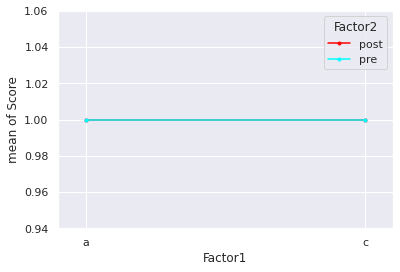

In [34]:
fig = interaction_plot(data.Factor1, data.Factor2, data.Score) # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)

In [35]:
formula = 'Score ~ (Factor1) + (Factor2) + (Factor1):(Factor2)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
aov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え
print(aov_table) #被験者間効果の検定結果を出力

                          平方和   自由度        F値        p値
Factor1          3.235562e-33   1.0  0.003080  0.956167
Factor2          5.788410e-30   1.0  5.509883  0.026799
Factor1:Factor2  4.350034e-32   1.0  0.041407  0.840338
Residual         2.731431e-29  26.0       NaN       NaN


In [38]:
def tukey_hsd( lst, ind, n ):
    data_arr = np.hstack( lst )
    ind_arr = np.repeat(ind, n)
    res = pairwise_tukeyhsd(data_arr, ind_arr)
    print(vars(res))

In [39]:
A = np.array([15,9,18,14,18])
B = np.array([13,8,8,12,7])
C = np.array([10,6,11,7,12])
D = np.array([10,7,3,5,7])

tukey_hsd( (A,B,C,D), list('ABCD') , 5) 

{'_multicomp': <statsmodels.sandbox.stats.multicomp.MultiComparison object at 0x7f43acd2cdd0>, '_results_table': <class 'statsmodels.iolib.table.SimpleTable'>, 'q_crit': 4.046412438282386, 'reject': array([False,  True,  True, False, False, False]), 'meandiffs': array([-5.2, -5.6, -8.4, -0.4, -3.2, -2.8]), 'std_pairs': array([1.31339255, 1.31339255, 1.31339255, 1.31339255, 1.31339255,
       1.31339255]), 'confint': array([[-10.51452797,   0.11452797],
       [-10.91452797,  -0.28547203],
       [-13.71452797,  -3.08547203],
       [ -5.71452797,   4.91452797],
       [ -8.51452797,   2.11452797],
       [ -8.11452797,   2.51452797]]), 'df_total': 16, 'reject2': array([False,  True,  True, False, False, False]), 'variance': 8.625000000000002, 'pvalues': array([0.0562591 , 0.03714849, 0.00177409, 0.9       , 0.34502168,
       0.45735327]), 'data': array([15,  9, 18, 14, 18, 13,  8,  8, 12,  7, 10,  6, 11,  7, 12, 10,  7,
        3,  5,  7]), 'groups': array(['A', 'A', 'A', 'A', 'A', 'B